In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from topoflow.components import infil_green_ampt

Importing TopoFlow packages:
   topoflow.utils
   topoflow.utils.tests
   topoflow.components
   topoflow.components.tests
   topoflow.framework
   topoflow.framework.tests
   topoflow.gui (unfinished)
 
 
Paths for this package:
framework_dir = /Users/elja0262/Google Drive/active_projects/Topoflow_all/topoflow/topoflow/framework/
parent_dir    = /Users/elja0262/Google Drive/active_projects/Topoflow_all/topoflow/topoflow/
examples_dir  = /Users/elja0262/Google Drive/active_projects/Topoflow_all/topoflow/topoflow/examples/
__file__      = topoflow/framework/emeli.pyc
__name__      = topoflow.framework.emeli
 


In [10]:
cfg_file='topoflow/examples/Treynor_Iowa/June_20_67_infil_green_ampt.cfg'

In [11]:
m=infil_green_ampt.infil_component()

In [12]:
# will not run without these
m.P_rain=100.5
m.SM=1000
m.h_table=1
# need these for update to work
m.elev=0.0
m.initialize(cfg_file);
m.get_current_time()


 
Infiltration component: Initializing...
Imported netCDF4 version: 1.1.9


array(0.0)

In [13]:
time = [m.get_current_time().copy()]
# NOTE: EMELI does not have get_value
I = [m.get_values('soil_surface_water__time_integral_of_infiltration_volume_flux').copy()]
#This parapemter does not work (TypeError: data type "unknown" not understood)
#fc = [m.get_values('soil_water__potential_infiltration_volume_flux').copy()] 
vol_Rg = [m.get_values('soil_water_sat-zone_top__domain_time_integral_of_recharge_volume_flux').copy()]
Rg = [m.get_values('soil_water_sat-zone_top__recharge_volume_flux').copy()]
#Q_sum = [m.get_values('land_surface_net-total-energy__energy_flux').copy()]

print I, m.get_current_time(), m.get_end_time()
while m.get_current_time() < m.get_end_time():
    m.update()
    time.append(m.get_current_time().copy())
    I.append(m.get_values('soil_surface_water__time_integral_of_infiltration_volume_flux').copy())
    #fc.append = [m.get_values('soil_water__potential_infiltration_volume_flux').copy()] 
    vol_Rg.append(m.get_values('soil_water_sat-zone_top__domain_time_integral_of_recharge_volume_flux').copy())
    Rg.append(m.get_values('soil_water_sat-zone_top__recharge_volume_flux').copy())    

print time, I

[array([[  1.00000000e-06,   1.00000000e-06,   1.00000000e-06, ...,
          1.00000000e-06,   1.00000000e-06,   1.00000000e-06],
       [  1.00000000e-06,   1.00000000e-06,   1.00000000e-06, ...,
          1.00000000e-06,   1.00000000e-06,   1.00000000e-06],
       [  1.00000000e-06,   1.00000000e-06,   1.00000000e-06, ...,
          1.00000000e-06,   1.00000000e-06,   1.00000000e-06],
       ..., 
       [  1.00000000e-06,   1.00000000e-06,   1.00000000e-06, ...,
          1.00000000e-06,   1.00000000e-06,   1.00000000e-06],
       [  1.00000000e-06,   1.00000000e-06,   1.00000000e-06, ...,
          1.00000000e-06,   1.00000000e-06,   1.00000000e-06],
       [  1.00000000e-06,   1.00000000e-06,   1.00000000e-06, ...,
          1.00000000e-06,   1.00000000e-06,   1.00000000e-06]])] 0.0 600.0
[array(0.0), array(60.0), array(120.0), array(180.0), array(240.0), array(300.0), array(360.0), array(420.0), array(480.0), array(540.0), array(600.0)] [array([[  1.00000000e-06,   1.00000000e-0

In [15]:
np.shape(I), np.shape(Rg), np.shape(vol_Rg)

((11, 44, 29), (11, 44, 29), (11,))

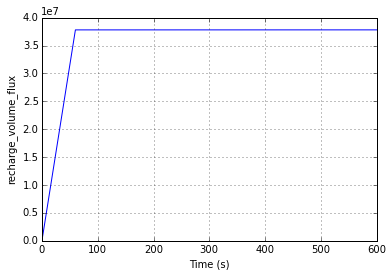

In [16]:
plt.plot(time,vol_Rg,'b'); 
plt.xlabel('Time (s)')
plt.ylabel('recharge_volume_flux')
#plt.title('Snow Melt rate vs. time')
plt.grid(); plt.show()